# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Откроем файл.

In [2]:
pd.set_option('display.max_columns', 50)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем первые 20 строк датафрейма.

In [4]:
data.tail(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23680,14,5000000.0,59.00,2019-04-04T00:00:00,3,2.50,5.0,52.0,1,NaN,False,False,7.00,NaN,Санкт-Петербург,26835.0,11878.0,0.0,NaN,0.0,NaN,NaN
23681,13,5250000.0,43.00,2018-05-11T00:00:00,2,2.50,5.0,29.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,28323.0,7262.0,1.0,497.0,2.0,660.0,80.0
23682,11,2350000.0,35.60,2016-06-23T00:00:00,1,2.50,5.0,17.0,4,False,False,False,8.30,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.5,3,NaN,False,False,5.50,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,False,False,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,False,False,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23686,8,3300000.0,31.00,2017-04-29T00:00:00,1,2.55,9.0,18.0,6,NaN,False,False,6.50,0.0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0
23687,6,3200000.0,39.00,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,False,False,11.00,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.00,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,False,False,15.00,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0


Выведем последние 20 строк датафрейма.

In [5]:
data.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21111,13,2050000.0,28.16,2018-03-01T00:00:00,0,NaN,12.0,18.44,5,NaN,True,False,NaN,2.0,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,160.0


Выведем рандомную строку датафрейма.

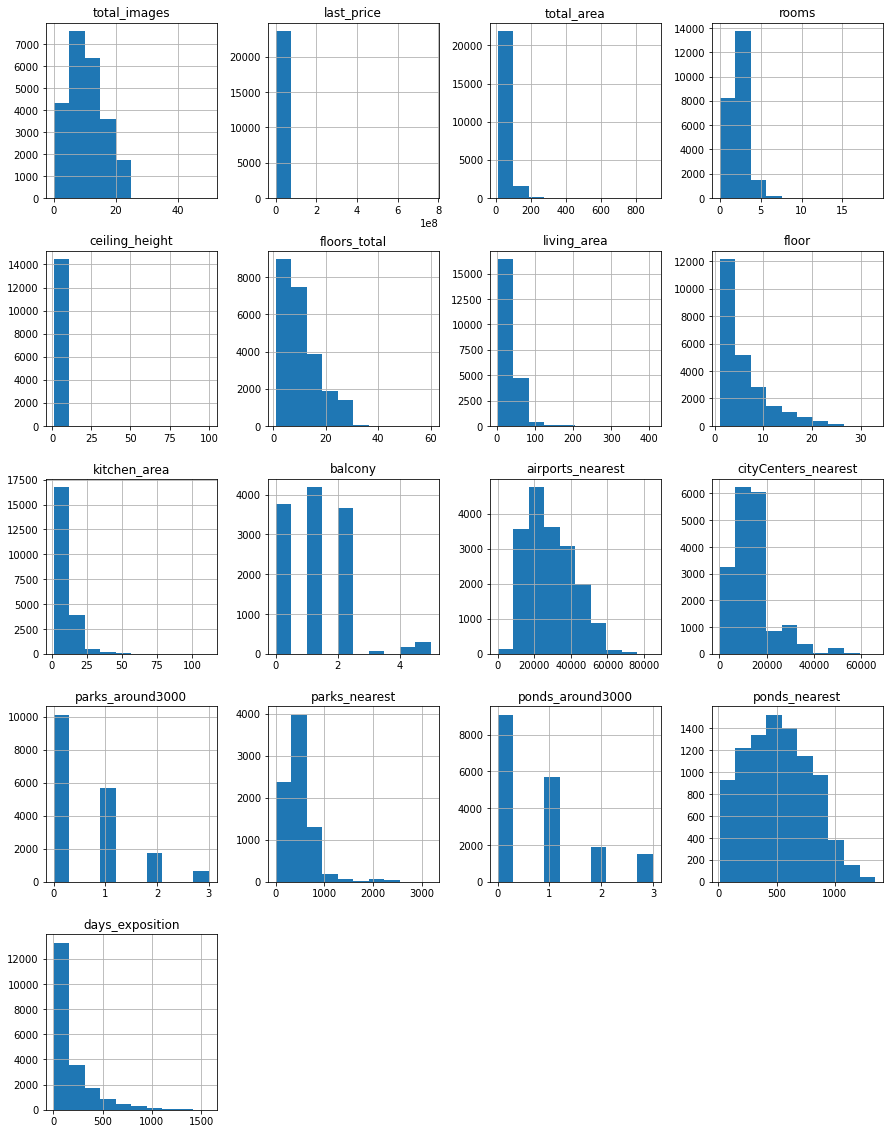

In [6]:
data.hist(figsize=(15, 20));

Построим общую гистограмму для всех столбцов таблицы.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Вызовем метод info().

In [8]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Изучим типы данных.

Изучив данные из датафрейма, я определила ряд задач по предобработке данных:
    1) избавиться от пропусков там, где это возможно;
    2) изменить типы данных;
    3) сгруппировать столбцы наиболее логичным образом.
Остальные задачи выясним и решим в ходе предобработки данных.

### Предобработка данных

In [9]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [10]:
data.isna().sum().sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Определим в каких столбцах есть пропуски и посчитаем их количество.

In [11]:
data.isna().sum().sort_values(ascending = False)/data.shape[0]*100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

Посчитаем долю пропусков в процентах и отобразим в порядке убывания.

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['balcony']=data['balcony'].fillna(0)
data['is_apartment']=data['is_apartment'].fillna(True)

Заполним пропущенные значения там, где это возможно и необходимо. Пропуски в данных могли появиться из-за ошибок при выгрузке данных, либо же продавцы ленились заполнять некоторые столбцы, или же не знали данные для заполнения.

In [13]:
data['last_price'] = data['last_price'].astype(int)
data['balcony'] = data['balcony'].astype(int)

Изменим типы данных. Балконы не могут быть числом с плавающей точкой, а цена с ценой будет удобнее работать, когда она будет целым числом (+ суммы достаточно большие, копейки нам ни к чему и их нет). 

In [14]:
data.rename(columns = {'airports_nearest' : 'airports_nearest_m', 'cityCenters_nearest':'city_centers_nearest_m', 'parks_nearest':'parks_nearest_m','ponds_nearest':'ponds_nearest_m'}, inplace = True)

Переименуем некоторые столбцы.

In [15]:
data = data[['last_price','locality_name','days_exposition','open_plan','is_apartment','studio','total_area','rooms','floor','floors_total','living_area', 'kitchen_area','ceiling_height','balcony','total_images','first_day_exposition','city_centers_nearest_m','airports_nearest_m', 'parks_nearest_m','ponds_nearest_m','parks_around3000','ponds_around3000']]
data

,last_price,locality_name,days_exposition,open_plan,is_apartment,studio,total_area,rooms,floor,floors_total,living_area,kitchen_area,ceiling_height,balcony,total_images,first_day_exposition,city_centers_nearest_m,airports_nearest_m,parks_nearest_m,ponds_nearest_m,parks_around3000,ponds_around3000
0,13000000,Санкт-Петербург,NaN,False,True,False,108.00,3,8,16.0,51.0,25.00,2.70,0,20,2019-03-07T00:00:00,16028.0,18863.0,482.0,755.0,1.0,2.0
1,3350000,посёлок Шушары,81.0,False,True,False,40.40,1,1,11.0,18.6,11.00,2.65,2,7,2018-12-04T00:00:00,18603.0,12817.0,NaN,NaN,0.0,0.0
2,5196000,Санкт-Петербург,558.0,False,True,False,56.00,2,4,5.0,34.3,8.30,2.65,0,10,2015-08-20T00:00:00,13933.0,21741.0,90.0,574.0,1.0,2.0
3,64900000,Санкт-Петербург,424.0,False,True,False,159.00,3,9,14.0,NaN,NaN,2.65,0,0,2015-07-24T00:00:00,6800.0,28098.0,84.0,234.0,2.0,3.0
4,10000000,Санкт-Петербург,121.0,False,True,False,100.00,2,13,14.0,32.0,41.00,3.03,0,2,2018-06-19T00:00:00,8098.0,31856.0,112.0,48.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000,Санкт-Петербург,NaN,False,True,False,133.81,3,3,5.0,73.3,13.83,3.70,0,9,2017-03-21T00:00:00,4232.0,24665.0,796.0,381.0,1.0,3.0
23695,3100000,Тосно,45.0,False,True,False,59.00,3,4,5.0,38.0,8.50,2.65,0,14,2018-01-15T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
23696,2500000,село Рождествено,NaN,False,True,False,56.70,2,1,3.0,29.7,NaN,2.65,0,18,2018-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
23697,11475000,Санкт-Петербург,602.0,False,True,False,76.75,2,12,17.0,NaN,23.30,3.00,2,13,2017-03-28T00:00:00,10364.0,39140.0,173.0,196.0,2.0,3.0


Переставим столбцы местами для наглядности.

С первыми тремя поставленными ранее задачами по справились.

In [16]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Изучим уникальные значения.

In [17]:
data['locality_name'] = data['locality_name'].str.lower()

Приведем строки к нижнему регистру.

In [18]:
data['locality_name'].value_counts()

санкт-петербург                                      15721
посёлок мурино                                         522
посёлок шушары                                         440
всеволожск                                             398
пушкин                                                 369
                                                     ...  
деревня курковицы                                        1
посёлок при железнодорожной станции приветнинское        1
поселок цвылёво                                          1
коттеджный поселок кивеннапа север                       1
поселок лисий нос                                        1
Name: locality_name, Length: 364, dtype: int64

Вернем количество уникальных значений.

In [19]:
data['locality_name'] = data['locality_name'].str.replace('ё','е', regex = True)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')

In [20]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское

Заменим 'ё' на 'е'.

In [21]:
data

,last_price,locality_name,days_exposition,open_plan,is_apartment,studio,total_area,rooms,floor,floors_total,living_area,kitchen_area,ceiling_height,balcony,total_images,first_day_exposition,city_centers_nearest_m,airports_nearest_m,parks_nearest_m,ponds_nearest_m,parks_around3000,ponds_around3000
0,13000000,санкт-петербург,NaN,False,True,False,108.00,3,8,16.0,51.0,25.00,2.70,0,20,2019-03-07T00:00:00,16028.0,18863.0,482.0,755.0,1.0,2.0
1,3350000,поселок шушары,81.0,False,True,False,40.40,1,1,11.0,18.6,11.00,2.65,2,7,2018-12-04T00:00:00,18603.0,12817.0,NaN,NaN,0.0,0.0
2,5196000,санкт-петербург,558.0,False,True,False,56.00,2,4,5.0,34.3,8.30,2.65,0,10,2015-08-20T00:00:00,13933.0,21741.0,90.0,574.0,1.0,2.0
3,64900000,санкт-петербург,424.0,False,True,False,159.00,3,9,14.0,NaN,NaN,2.65,0,0,2015-07-24T00:00:00,6800.0,28098.0,84.0,234.0,2.0,3.0
4,10000000,санкт-петербург,121.0,False,True,False,100.00,2,13,14.0,32.0,41.00,3.03,0,2,2018-06-19T00:00:00,8098.0,31856.0,112.0,48.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000,санкт-петербург,NaN,False,True,False,133.81,3,3,5.0,73.3,13.83,3.70,0,9,2017-03-21T00:00:00,4232.0,24665.0,796.0,381.0,1.0,3.0
23695,3100000,тосно,45.0,False,True,False,59.00,3,4,5.0,38.0,8.50,2.65,0,14,2018-01-15T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
23696,2500000,село рождествено,NaN,False,True,False,56.70,2,1,3.0,29.7,NaN,2.65,0,18,2018-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
23697,11475000,санкт-петербург,602.0,False,True,False,76.75,2,12,17.0,NaN,23.30,3.00,2,13,2017-03-28T00:00:00,10364.0,39140.0,173.0,196.0,2.0,3.0


In [22]:
data.isna().sum() * 100 / len(data)

last_price                 0.000000
locality_name              0.206760
days_exposition           13.422507
open_plan                  0.000000
is_apartment               0.000000
studio                     0.000000
total_area                 0.000000
rooms                      0.000000
floor                      0.000000
floors_total               0.362885
living_area                8.029875
kitchen_area               9.612220
ceiling_height             0.000000
balcony                    0.000000
total_images               0.000000
first_day_exposition       0.000000
city_centers_nearest_m    23.287902
airports_nearest_m        23.384953
parks_nearest_m           65.909954
ponds_nearest_m           61.559559
parks_around3000          23.283683
ponds_around3000          23.283683
dtype: float64

Посчитаем долю пропусков в столбцах от общего числа данных. Больше всего пропусков в столбцах city_centers_nearest_m, airports_nearest_m, parks_nearest_m, ponds_nearest_m, parks_around3000, ponds_around3000 - их мы трогать не будем, в исследовании мы их особо не касаемся. Столбец days_exposition трогать не будем, предугадать сколько дней было размещено объявление мы не сможем, удалить ненужные строки тоже не следует - слишком большой объем данных. Аналогично с living_area и kitchen_area. Количество этажей в доме floors_total , по моему мнению, параметр важный, оставим его с пропусками (их немного). А вот столбец locality_name очень важен, первое на что смотрит покупатель - это название места, где квартира находится, поэтому удалим строки с отсутствующими названиями населенных пунктов.

In [23]:
data.dropna(subset=['locality_name'])

,last_price,locality_name,days_exposition,open_plan,is_apartment,studio,total_area,rooms,floor,floors_total,living_area,kitchen_area,ceiling_height,balcony,total_images,first_day_exposition,city_centers_nearest_m,airports_nearest_m,parks_nearest_m,ponds_nearest_m,parks_around3000,ponds_around3000
0,13000000,санкт-петербург,NaN,False,True,False,108.00,3,8,16.0,51.0,25.00,2.70,0,20,2019-03-07T00:00:00,16028.0,18863.0,482.0,755.0,1.0,2.0
1,3350000,поселок шушары,81.0,False,True,False,40.40,1,1,11.0,18.6,11.00,2.65,2,7,2018-12-04T00:00:00,18603.0,12817.0,NaN,NaN,0.0,0.0
2,5196000,санкт-петербург,558.0,False,True,False,56.00,2,4,5.0,34.3,8.30,2.65,0,10,2015-08-20T00:00:00,13933.0,21741.0,90.0,574.0,1.0,2.0
3,64900000,санкт-петербург,424.0,False,True,False,159.00,3,9,14.0,NaN,NaN,2.65,0,0,2015-07-24T00:00:00,6800.0,28098.0,84.0,234.0,2.0,3.0
4,10000000,санкт-петербург,121.0,False,True,False,100.00,2,13,14.0,32.0,41.00,3.03,0,2,2018-06-19T00:00:00,8098.0,31856.0,112.0,48.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000,санкт-петербург,NaN,False,True,False,133.81,3,3,5.0,73.3,13.83,3.70,0,9,2017-03-21T00:00:00,4232.0,24665.0,796.0,381.0,1.0,3.0
23695,3100000,тосно,45.0,False,True,False,59.00,3,4,5.0,38.0,8.50,2.65,0,14,2018-01-15T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
23696,2500000,село рождествено,NaN,False,True,False,56.70,2,1,3.0,29.7,NaN,2.65,0,18,2018-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
23697,11475000,санкт-петербург,602.0,False,True,False,76.75,2,12,17.0,NaN,23.30,3.00,2,13,2017-03-28T00:00:00,10364.0,39140.0,173.0,196.0,2.0,3.0


Удалим строки с отсутствующими названиями населенных пунктов.

In [24]:
data.describe()

,last_price,days_exposition,total_area,rooms,floor,floors_total,living_area,kitchen_area,ceiling_height,balcony,total_images,city_centers_nearest_m,airports_nearest_m,parks_nearest_m,ponds_nearest_m,parks_around3000,ponds_around3000
count,2.369900e+04,20518.000000,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,21421.000000,23699.000000,23699.000000,23699.000000,18180.000000,18157.000000,8079.000000,9110.000000,18181.000000,18181.000000
mean,6.541549e+06,180.888634,60.348651,2.070636,5.892358,10.673824,34.457852,10.569807,2.724358,0.591080,9.858475,14191.277833,28793.672193,490.804555,517.980900,0.611408,0.770255
std,1.088701e+07,219.727988,35.654083,1.078405,4.885249,6.597173,22.030445,5.905438,0.988298,0.959298,5.682529,8608.386210,12630.880622,342.317995,277.720643,0.802074,0.938346
min,1.219000e+04,1.000000,12.000000,0.000000,1.000000,1.000000,2.000000,1.300000,1.000000,0.000000,0.000000,181.000000,0.000000,1.000000,13.000000,0.000000,0.000000
25%,3.400000e+06,45.000000,40.000000,1.000000,2.000000,5.000000,18.600000,7.000000,2.600000,0.000000,6.000000,9238.000000,18585.000000,288.000000,294.000000,0.000000,0.000000
50%,4.650000e+06,95.000000,52.000000,2.000000,4.000000,9.000000,30.000000,9.100000,2.650000,0.000000,9.000000,13098.500000,26726.000000,455.000000,502.000000,0.000000,1.000000
75%,6.800000e+06,232.000000,69.900000,3.000000,8.000000,16.000000,42.300000,12.000000,2.700000,1.000000,14.000000,16293.000000,37273.000000,612.000000,729.000000,1.000000,1.000000
max,7.630000e+08,1580.000000,900.000000,19.000000,33.000000,60.000000,409.700000,112.000000,100.000000,5.000000,50.000000,65968.000000,84869.000000,3190.000000,1344.000000,3.000000,3.000000


Вызовем метод describe() и изучим значения. Узучим аномалии и их природу.

In [25]:
for height in data['ceiling_height']:
    if height <= 2.5 :
        data['ceiling_height'].dropna()
        print(data['ceiling_height'])

0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64
0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64
0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64
0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64
0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, 

Удалим столбцы, где высота потолка меньше 2.5 м;

In [26]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [27]:
for height in data['ceiling_height']:
    if height > 4 :
        print(height)

4.15
25.0
5.2
5.3
5.0
4.06
4.7
5.6
4.19
4.8
4.5
4.2
4.19
4.5
32.0
8.0
4.37
25.0
27.0
4.1
24.0
27.0
26.0
27.0
8.3
4.1
25.0
4.2
4.4
4.5
4.2
4.4
4.2
4.45
5.5
4.45
25.0
4.5
4.5
4.3
27.0
4.2
4.1
25.0
4.4
4.65
5.3
4.5
25.0
4.5
4.2
14.0
4.14
8.0
4.25
8.0
20.0
27.0
25.0
4.2
4.7
6.0
27.0
22.6
4.2
5.8
27.5
27.0
4.9
4.2
10.3
32.0
4.2
100.0
27.0


Выведем те значния высоты потолков, которые больше 4 м. Видим, что в некоторых случаях нужно сдвинуть запятую на один знак влево, ниже сделаем это.

In [28]:
new_hight = data['ceiling_height'][data['ceiling_height']>10]/10
for height in data['ceiling_height']:
     if height >= 25 and height < 40:
            data['ceiling_height'] == data['ceiling_height'].fillna(new_hight)

In [29]:
data['ceiling_height'][data['ceiling_height']>10] = data['ceiling_height'][data['ceiling_height']>10]/10


In [30]:
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

<AxesSubplot:>

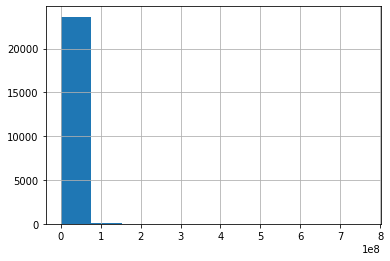

In [31]:
data.last_price.hist()

<AxesSubplot:>

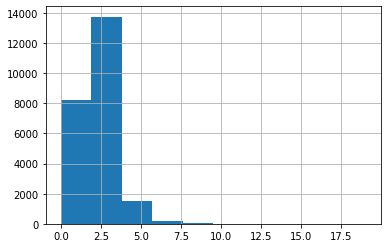

In [32]:
data.rooms.hist()

<AxesSubplot:>

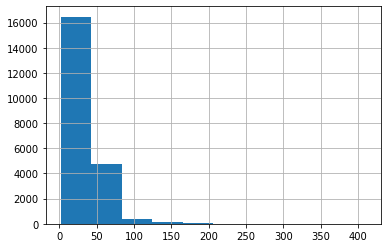

In [33]:
data.living_area.hist()

In [34]:
data_new = data.query('living_area <= 250 and rooms <= 10 and last_price <= 200000000')

In [35]:
data_new.shape[0] / data.shape[0]

0.9186463563863454

In [36]:
data_new.describe()

,last_price,days_exposition,total_area,rooms,floor,floors_total,living_area,kitchen_area,ceiling_height,balcony,total_images,city_centers_nearest_m,airports_nearest_m,parks_nearest_m,ponds_nearest_m,parks_around3000,ponds_around3000
count,2.177100e+04,18792.000000,21771.000000,21771.000000,21771.000000,21718.000000,21771.000000,20958.000000,21771.000000,21771.000000,21771.000000,16875.000000,16856.000000,7484.000000,8397.000000,16876.000000,16876.000000
mean,6.322921e+06,184.738399,59.686473,2.064627,5.890313,10.651303,34.213654,10.483215,2.697869,0.616095,10.015296,14250.467259,28769.955268,487.949492,519.552936,0.608971,0.763688
std,7.444689e+06,220.947904,32.137009,1.049270,4.869090,6.570786,20.621271,5.695506,0.238212,0.967628,5.675038,8662.458492,12657.128233,337.968664,277.006971,0.799504,0.935603
min,1.219000e+04,1.000000,12.000000,0.000000,1.000000,1.000000,2.000000,1.300000,1.000000,0.000000,0.000000,181.000000,0.000000,1.000000,13.000000,0.000000,0.000000
25%,3.450000e+06,44.000000,40.000000,1.000000,2.000000,5.000000,18.600000,7.000000,2.600000,0.000000,6.000000,9329.000000,18539.000000,287.000000,297.000000,0.000000,0.000000
50%,4.650000e+06,101.000000,52.000000,2.000000,4.000000,9.000000,30.000000,9.000000,2.650000,0.000000,10.000000,13116.000000,26676.500000,451.000000,503.000000,0.000000,0.000000
75%,6.750000e+06,239.000000,69.400000,3.000000,8.000000,16.000000,42.200000,12.000000,2.700000,1.000000,14.000000,16275.000000,37237.500000,610.000000,731.000000,1.000000,1.000000
max,1.908700e+08,1580.000000,488.000000,10.000000,33.000000,60.000000,250.000000,107.000000,10.000000,5.000000,50.000000,65968.000000,84869.000000,3190.000000,1344.000000,3.000000,3.000000


In [37]:
data = data_new

### Посчитайте и добавьте в таблицу новые столбцы

In [38]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

Посчитали цену квадратного метра.

In [39]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['day_of_week_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year
data['city_centers_nearest_km'] = round(data['city_centers_nearest_m']/1000)

Привели данные к нужному формату и добавили столбцы: день недели, месяц и год публикации объявления.

In [40]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)
data

,last_price,locality_name,days_exposition,open_plan,is_apartment,studio,total_area,rooms,floor,floors_total,living_area,kitchen_area,ceiling_height,balcony,total_images,first_day_exposition,city_centers_nearest_m,airports_nearest_m,parks_nearest_m,ponds_nearest_m,parks_around3000,ponds_around3000,price_per_square_meter,day_of_week_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type
0,13000000,санкт-петербург,NaN,False,True,False,108.00,3,8,16.0,51.0,25.00,2.70,0,20,2019-03-07,16028.0,18863.0,482.0,755.0,1.0,2.0,120370.370370,Thursday,March,2019,16.0,другой
1,3350000,поселок шушары,81.0,False,True,False,40.40,1,1,11.0,18.6,11.00,2.65,2,7,2018-12-04,18603.0,12817.0,NaN,NaN,0.0,0.0,82920.792079,Tuesday,December,2018,19.0,первый
2,5196000,санкт-петербург,558.0,False,True,False,56.00,2,4,5.0,34.3,8.30,2.65,0,10,2015-08-20,13933.0,21741.0,90.0,574.0,1.0,2.0,92785.714286,Thursday,August,2015,14.0,другой
4,10000000,санкт-петербург,121.0,False,True,False,100.00,2,13,14.0,32.0,41.00,3.03,0,2,2018-06-19,8098.0,31856.0,112.0,48.0,2.0,1.0,100000.000000,Tuesday,June,2018,8.0,другой
5,2890000,городской поселок янино-1,55.0,False,True,False,30.40,1,5,12.0,14.4,9.10,2.65,0,10,2018-09-10,NaN,NaN,NaN,NaN,NaN,NaN,95065.789474,Monday,September,2018,NaN,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,4600000,петергоф,239.0,False,True,False,62.40,3,8,9.0,40.0,8.00,2.60,0,9,2016-08-05,34104.0,45602.0,352.0,675.0,1.0,1.0,73717.948718,Friday,August,2016,34.0,другой
23694,9700000,санкт-петербург,NaN,False,True,False,133.81,3,3,5.0,73.3,13.83,3.70,0,9,2017-03-21,4232.0,24665.0,796.0,381.0,1.0,3.0,72490.845228,Tuesday,March,2017,4.0,другой
23695,3100000,тосно,45.0,False,True,False,59.00,3,4,5.0,38.0,8.50,2.65,0,14,2018-01-15,NaN,NaN,NaN,NaN,NaN,NaN,52542.372881,Monday,January,2018,NaN,другой
23696,2500000,село рождествено,NaN,False,True,False,56.70,2,1,3.0,29.7,NaN,2.65,0,18,2018-02-11,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758,Sunday,February,2018,NaN,первый


Разобрались с этажами.

### Проведите исследовательский анализ данных

In [41]:
data.describe()

,last_price,days_exposition,total_area,rooms,floor,floors_total,living_area,kitchen_area,ceiling_height,balcony,total_images,city_centers_nearest_m,airports_nearest_m,parks_nearest_m,ponds_nearest_m,parks_around3000,ponds_around3000,price_per_square_meter,year_exposition,city_centers_nearest_km
count,2.177100e+04,18792.000000,21771.000000,21771.000000,21771.000000,21718.000000,21771.000000,20958.000000,21771.000000,21771.000000,21771.000000,16875.000000,16856.000000,7484.000000,8397.000000,16876.000000,16876.000000,21771.000000,21771.000000,16875.000000
mean,6.322921e+06,184.738399,59.686473,2.064627,5.890313,10.651303,34.213654,10.483215,2.697869,0.616095,10.015296,14250.467259,28769.955268,487.949492,519.552936,0.608971,0.763688,99089.356734,2017.349042,14.243733
std,7.444689e+06,220.947904,32.137009,1.049270,4.869090,6.570786,20.621271,5.695506,0.238212,0.967628,5.675038,8662.458492,12657.128233,337.968664,277.006971,0.799504,0.935603,44482.706588,1.048363,8.668696
min,1.219000e+04,1.000000,12.000000,0.000000,1.000000,1.000000,2.000000,1.300000,1.000000,0.000000,0.000000,181.000000,0.000000,1.000000,13.000000,0.000000,0.000000,111.834862,2014.000000,0.000000
25%,3.450000e+06,44.000000,40.000000,1.000000,2.000000,5.000000,18.600000,7.000000,2.600000,0.000000,6.000000,9329.000000,18539.000000,287.000000,297.000000,0.000000,0.000000,77142.857143,2017.000000,9.000000
50%,4.650000e+06,101.000000,52.000000,2.000000,4.000000,9.000000,30.000000,9.000000,2.650000,0.000000,10.000000,13116.000000,26676.500000,451.000000,503.000000,0.000000,0.000000,95081.967213,2017.000000,13.000000
75%,6.750000e+06,239.000000,69.400000,3.000000,8.000000,16.000000,42.200000,12.000000,2.700000,1.000000,14.000000,16275.000000,37237.500000,610.000000,731.000000,1.000000,1.000000,113933.157387,2018.000000,16.000000
max,1.908700e+08,1580.000000,488.000000,10.000000,33.000000,60.000000,250.000000,107.000000,10.000000,5.000000,50.000000,65968.000000,84869.000000,3190.000000,1344.000000,3.000000,3.000000,995983.935743,2019.000000,66.000000


count    21771.000000
mean        59.686473
std         32.137009
min         12.000000
25%         40.000000
50%         52.000000
75%         69.400000
max        488.000000
Name: total_area, dtype: float64

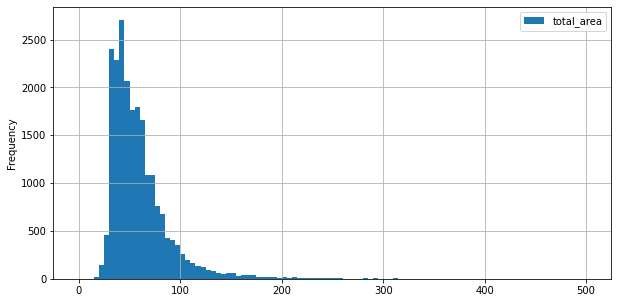

In [42]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,500))
data['total_area'].describe()

Средняя площадь продаваемых квартир - 60 кв.м, медиана расположилась неподалеку 52 кв.м. Минимальное и максимальное значения реальны - такие квартиры действительно существуют.

count    21771.000000
mean        34.213654
std         20.621271
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        250.000000
Name: living_area, dtype: float64

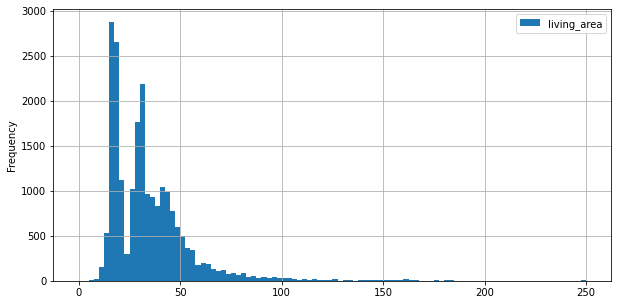

In [43]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,250))
data['living_area'].describe()

Средняя площадь жилых помещений - 34 кв.м, медиана расположилась неподалеку 30 кв.м. Минимальное значение странновато, скорее всего - это выброс. Максимальное определилось путем отброса аномальных значений. 

count    20958.000000
mean        10.483215
std          5.695506
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

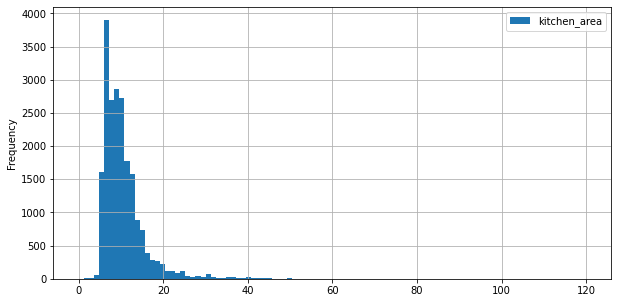

In [44]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,120))
data['kitchen_area'].describe()

In [45]:
data['last_price']=data['last_price']/1000000

count    21771.000000
mean         6.322921
std          7.444689
min          0.012190
25%          3.450000
50%          4.650000
75%          6.750000
max        190.870000
Name: last_price, dtype: float64

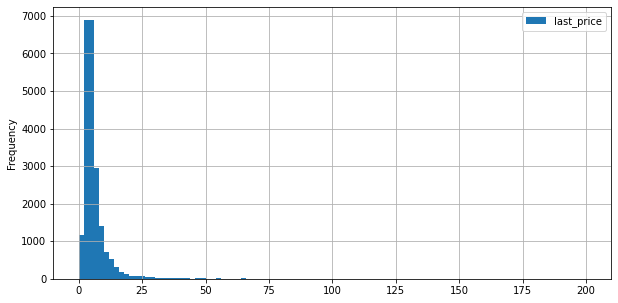

In [46]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,200))
data['last_price'].describe()

Цены за квартиры по графику выглядят вполне правдоподобно. Анамалии мы отбросили шагом ранее.

count    21771.000000
mean         2.064627
std          1.049270
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64

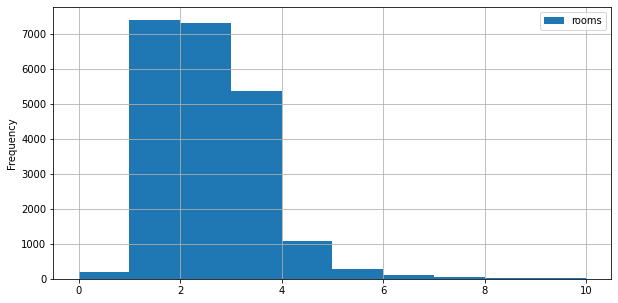

In [47]:
data.plot(y = 'rooms', kind = 'hist', bins = data['rooms'].max(), grid=True, figsize = (10,5), range = (0,10))
data['rooms'].describe()

Минимальное значение в виде 0 - явный выброс, либо это студия, где не указано количество комнат в принципе. Выбросы в виде значений больше 10 комнат были удалены шагом ранее - это странное количество комнат для квартир (если бы были частные дома и коттеджи - то ок). Больше всего продают квартир, где 1 или 2 комнаты.

count    21771.000000
mean         2.697869
std          0.238212
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

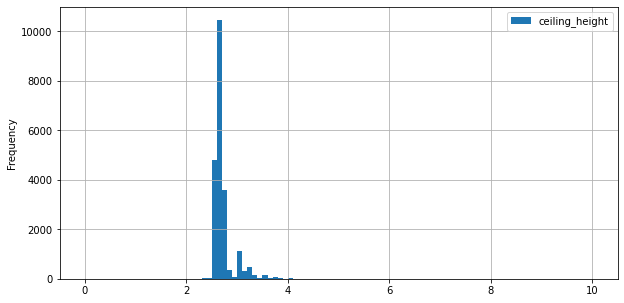

In [48]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,10))
data['ceiling_height'].describe()

Минимальные и максимальные данные не очень схожи с реальностью. Среднее и медиана - ок. Высота потолков соответсвует действительности.

count    21771.000000
mean         5.890313
std          4.869090
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

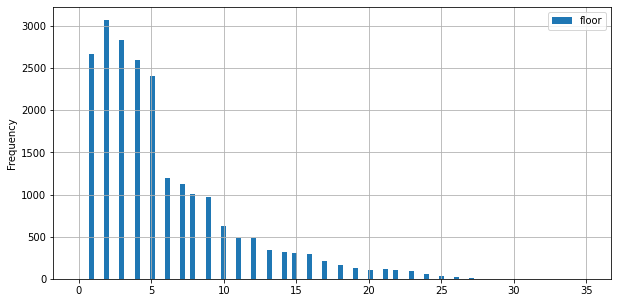

In [49]:
data.plot(y = 'floor', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,35))
data['floor'].describe()

Исходя из этой гистограммы можно сделать вывод, что квартиры чаще всего продаются НЕ на первом и не на последнем этаже.

<AxesSubplot:xlabel='floor_type', ylabel='Count'>

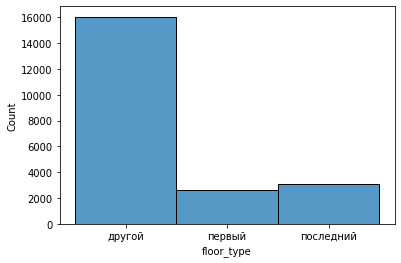

In [50]:
sns.histplot(data=data, x='floor_type')

Исходя из этой гистограммы можно сделать вывод, что квартиры чаще всего продаются НЕ на первом и не на последнем этаже.

count    21718.000000
mean        10.651303
std          6.570786
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

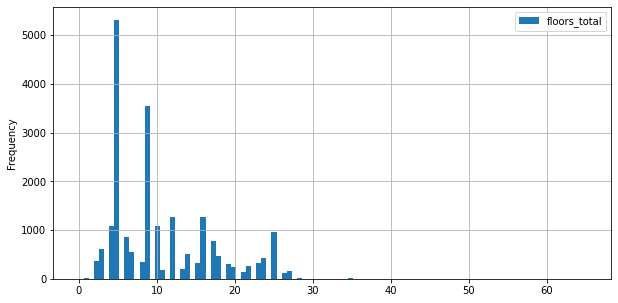

In [51]:
data.plot(y = 'floors_total', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,65))
data['floors_total'].describe()

Выставленые на продажу квартиры чаще всего находятся в домах 10 этажных.

count    16875.000000
mean     14250.467259
std       8662.458492
min        181.000000
25%       9329.000000
50%      13116.000000
75%      16275.000000
max      65968.000000
Name: city_centers_nearest_m, dtype: float64

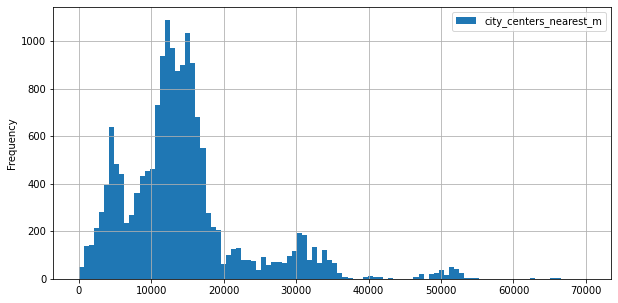

In [52]:
data.plot(y = 'city_centers_nearest_m', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,70000))
data['city_centers_nearest_m'].describe()

Квартиры продаются и в самом сердце Петербурга и на большом отдалении (65 км). Интересно, что есть центр города для наших данных и откуда считается это расстояние.

count    16856.000000
mean     28769.955268
std      12657.128233
min          0.000000
25%      18539.000000
50%      26676.500000
75%      37237.500000
max      84869.000000
Name: airports_nearest_m, dtype: float64

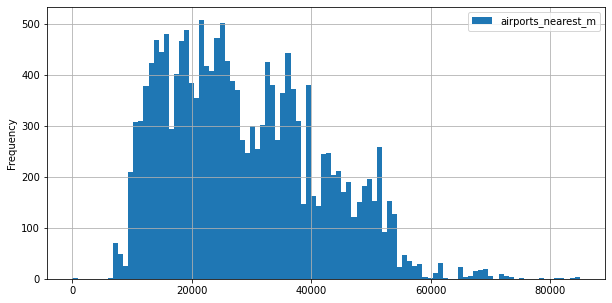

In [53]:
data.plot(y = 'airports_nearest_m', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,85000))
data['airports_nearest_m'].describe()

Максимальное и минимальное значения выглядят странновато. А остальные данные соответствуют действительности.

count    7484.000000
mean      487.949492
std       337.968664
min         1.000000
25%       287.000000
50%       451.000000
75%       610.000000
max      3190.000000
Name: parks_nearest_m, dtype: float64

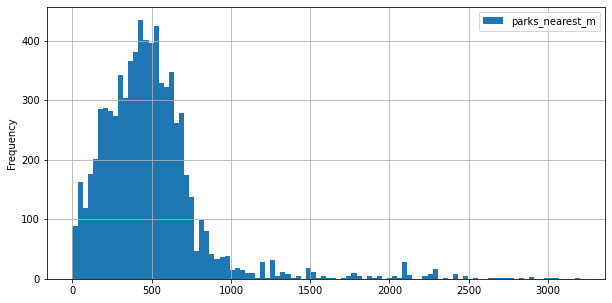

In [54]:
data.plot(y = 'parks_nearest_m', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,3200))
data['parks_nearest_m'].describe()

Здесь ничего необычного. На расстоянии 500 м возле большинства домов в Питере есть парк.

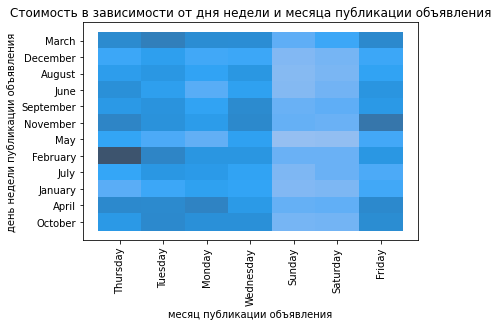

In [55]:
sns.histplot(data=data, x='day_of_week_exposition', y = 'month_exposition');
plt.xticks(rotation = 90);
plt.title('Стоимость в зависимости от дня недели и месяца публикации объявления');
plt.xlabel('месяц публикации объявления');
plt.ylabel('день недели публикации объявления');

По выходным активность минимальная. Так же в сфере недвижимости присутствует сезонность.

Изучив диаграммы становится понятно, что присутсвуют выбросы. Как мне кажется, они не сильно влияют на ход нашей работы, удалять их не будем. Однако обязательно стоит почему так получилось у тех людей, кто данные нам предоставлял. 

count    18792.000000
mean       184.738399
std        220.947904
min          1.000000
25%         44.000000
50%        101.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

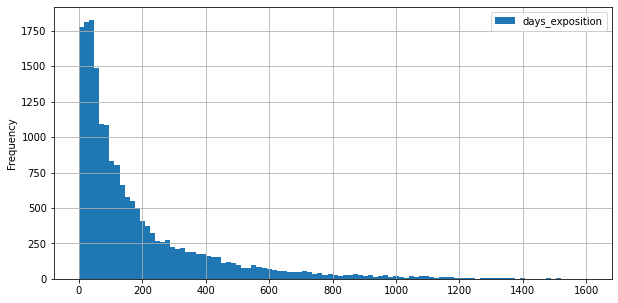

In [56]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,1600))
data['days_exposition'].describe()

Быстрыми можно считать продажи менее 45 дней. Долгими - более 230. Среднее значение - 180 дней, или полгода. Медиана - 95 дней, или 3 месяца - столько обычно продаются квартиры. 

In [57]:
data['new_total_price'] = data['last_price']/1000000

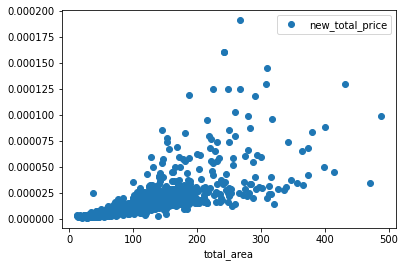

In [58]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'new_total_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.plot(y = 'median', style = 'o');

Зависимость ярко не выражена. Но стоимость немного возрастаем с ростом площади.

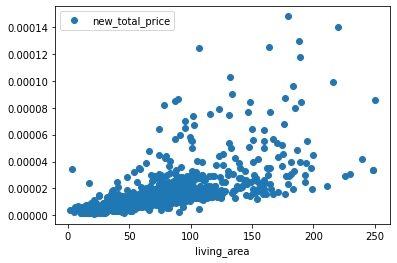

In [59]:
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'new_total_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.plot(y = 'median',style = 'o');

Аналогично.

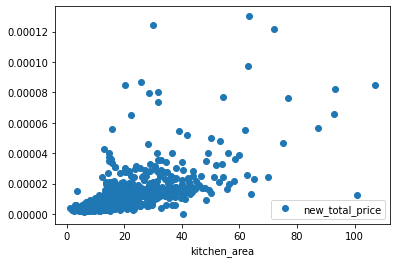

In [60]:
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'new_total_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.plot(y = 'median',style = 'o');

Аналогично.

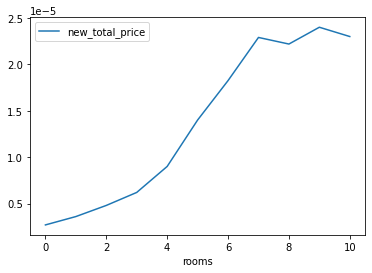

In [61]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'new_total_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.plot(y = 'median');

Стоимость жилья возрастает вместе с количеством комнат, что вполне логично. После удаления выбросов это стало видно более явно.

<AxesSubplot:xlabel='floor_type', ylabel='new_total_price'>

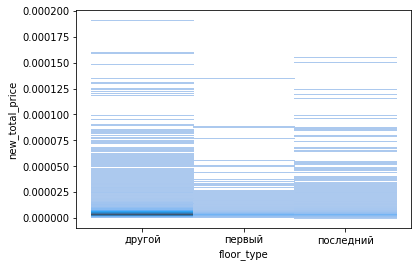

In [62]:
sns.histplot(data=data, x='floor_type', y='new_total_price')

По графику сложно что-то понять. Однако квартиры на 1 этаже - дешевле всего. Посмею предположить, что квартиры на последнем этаже могут быть как очень дешевыми (старый дом, крыша течет и тд), так и очень дорогими (например, из-за вида.)

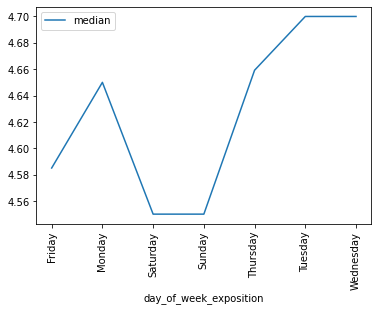

In [63]:
pivot_table_day_of_week_exposition = data.pivot_table(index = 'day_of_week_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_day_of_week_exposition.columns = ['mean', 'count', 'median']
pivot_table_day_of_week_exposition.plot(y = 'median')
plt.xticks(rotation = 90);

Стоимость квартир, выложенных в выходной - меньше, чем в остальные дни.

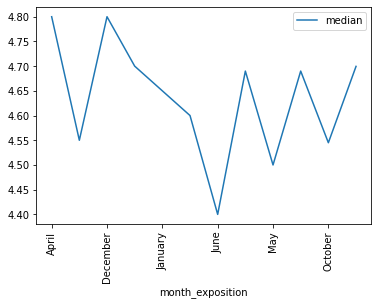

In [64]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')
plt.xticks(rotation = 90);

Самая низкая стоимость - май и июнь, тут и подтверждается сезонность (пора отпусков, люди тратят свои накопления на отдых и дела, которые не успели сделать за рабочий год). 

<AxesSubplot:xlabel='year_exposition'>

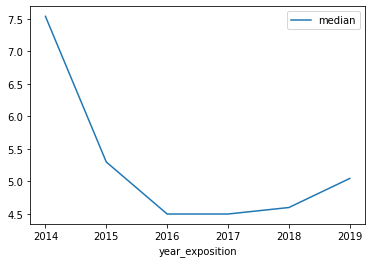

In [65]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

2014-2017 цены на квартиры падали, затем росли. 

In [66]:
data['locality_name'].value_counts().head(11)

санкт-петербург      14556
поселок мурино         492
поселок шушары         404
всеволожск             371
пушкин                 345
колпино                328
поселок парголово      301
гатчина                292
деревня кудрово        262
петергоф               197
выборг                 193
Name: locality_name, dtype: int64

In [67]:
locality_name_pivot = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_name_pivot.columns = ['count', 'mean']
locality_name_pivot = locality_name_pivot.sort_values('count', ascending = False).head(11)

In [68]:
locality_name_pivot

,count,mean
locality_name,,
санкт-петербург,14556,113629.393851
поселок мурино,492,86308.320783
поселок шушары,404,78886.398893
всеволожск,371,68880.131023
пушкин,345,103428.483885
колпино,328,75344.096345
поселок парголово,301,90442.587023
гатчина,292,68627.363919
деревня кудрово,262,92702.184418


In [69]:
locality_name_pivot[locality_name_pivot['mean']==locality_name_pivot['mean'].max()]

,count,mean
locality_name,,
санкт-петербург,14556,113629.393851


In [70]:
locality_name_pivot[locality_name_pivot['mean']==locality_name_pivot['mean'].min()]

,count,mean
locality_name,,
выборг,193,58190.333792


Самая высокая цена за кв.м - Санкт-Петербург, самая низкая - Выборг. Проверила на практике - так и есть.

,new_total_price
city_centers_nearest_km,
0,0.000033
1,0.000018
2,0.000017
3,0.000011
4,0.000012
5,0.000013
6,0.000014
7,0.000014
8,0.000009


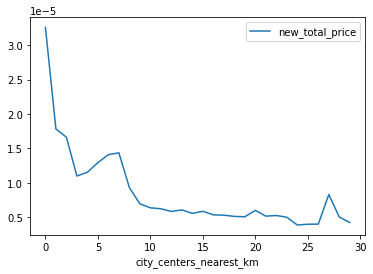

In [71]:
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].fillna(666666)
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('int')
spb_pivot = data.query('locality_name == "санкт-петербург" and city_centers_nearest_km !=666666').pivot_table(index = 'city_centers_nearest_km', values = 'new_total_price', aggfunc = 'mean')
spb_pivot.plot()
spb_pivot

In [72]:
data['city_centers_nearest_km'].describe()

count     21771.000000
mean     149935.101695
std      278338.459751
min           0.000000
25%          11.000000
50%          15.000000
75%          34.000000
max      666666.000000
Name: city_centers_nearest_km, dtype: float64

Расчитали стоимость каждого километра. Чем дальше от центра - тем ниже цена за кв.м.

### Общий вывод

В ходе проделанной работы используя различные методы я изучила информацию из архива объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за последние несколько лет. Мною была выполнена предобработка данных (поиск и замена пропущенных значений, изменение типов данных, поиск уникальных значений и устранение неявных дубликатов, поиск аномалий и их обработка). Также были рассчитаны новые параметры, которые помогли найти интересные особенности и зависимости в исследовательской работе. Эти зависимости я визуализировала путём построения сводных таблиц, графиков и гистограмм различных форм и видов. Наблюдения после каждого шага описывала текстом в виде кратких пояснений. И пришла к таким выводам:

- чем больше квартира (касатеся и количества комнат, и метража), тем выше ее стоимость
- чем выше находится квартира выше, тем выше ее стоимость
- чем квартира дальше от центра, тем ее стоимость ниже
- сфере недвижимости присуща сезонность
- спад и подъем цен на недвижимость может быть связан с экономической ситуацией в стране

